In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn import metrics

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

## Apriori and Association Rule Functions

In [2]:
def do_apriori(data, minimum_sup, country=''):

    if country != "":
        basket = (data[data['Country'] == country]
                .groupby(['InvoiceNo', 'Description'])['Quantity']
                .sum().unstack().reset_index().fillna(0)
                .set_index('InvoiceNo'))
     
    else:
        basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
                .sum().unstack().reset_index().fillna(0)
                .set_index('InvoiceNo'))

    basket_sets = basket.applymap(encode)

    frequent_itemsets = apriori(basket_sets, min_support=minimum_sup, use_colnames=True)

    return frequent_itemsets



In [3]:
def do_association_rule(data, picked_metric, picked_threshold): 
    return association_rules(data, metric=picked_metric, min_threshold=picked_threshold)

## Data Encoding and Visualisation Functions

In [4]:
def encode(x):
    if (x <= 0):
        return 0
    elif (x >= 1):
        return 1

In [5]:
def total_count_bar(data, group_by):
    plt.figure(figsize=[10,6])
    data.groupby(group_by).size().plot(kind='bar')
    plt.title('Transactions for each Country')
    plt.xlabel(group_by)    
    plt.ylabel('Total Count')
    plt.plot()

## Data Preparation and Retrieval

In [6]:
# Importing the Data
original_data = pd.read_csv("OnlineRetail.csv")
pd.set_option('max_colwidth', -1)

print('Number of unique Customers:  ', len(original_data.CustomerID.unique()))
print('Number of unique Invoice:    ', len(original_data.InvoiceNo.unique()))
print('Number of unique Stock items:', len(original_data.StockCode.unique()))
print()
print(len(original_data.Country.unique()), 'unique countries:')
print(original_data.Country.value_counts())

Number of unique Customers:   4335
Number of unique Invoice:     18405
Number of unique Stock items: 3659

37 unique countries:
United Kingdom          354005
Germany                 8659  
France                  8034  
EIRE                    7138  
Spain                   2423  
Netherlands             2326  
Belgium                 1935  
Switzerland             1811  
Portugal                1425  
Australia               1184  
Norway                  1049  
Channel Islands         744   
Italy                   741   
Finland                 647   
Cyprus                  612   
Sweden                  428   
Austria                 384   
Denmark                 367   
Poland                  325   
Japan                   321   
Israel                  248   
Unspecified             244   
Singapore               215   
Iceland                 182   
USA                     179   
Canada                  150   
Greece                  142   
Malta                   109   
Unit

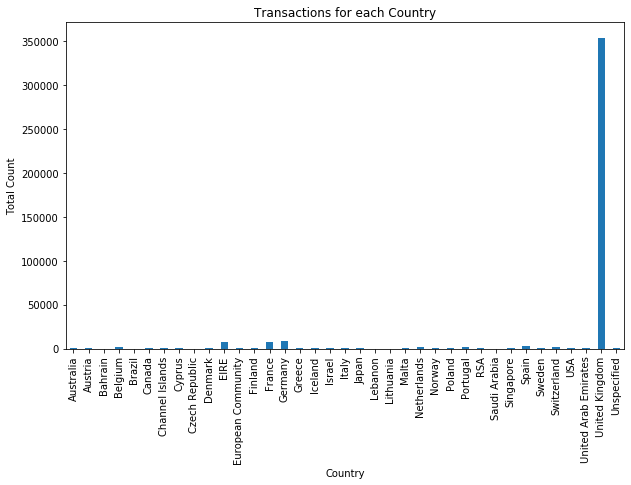

In [7]:
total_count_bar(original_data, 'Country')

#print(total_count_bar('InvoiceNo'))

## Analysing whole Dataset

In [8]:
frequent_items = do_apriori(original_data, 0.02)

frequent_items.head()

,support,itemsets
0,0.021842,(3 STRIPEY MICE FELTCRAFT)
1,0.039446,(6 RIBBONS RUSTIC CHARM)
2,0.025319,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035697,(60 TEATIME FAIRY CAKE CASES)
4,0.027221,(72 SWEETHEART FAIRY CAKE CASES)


In [9]:
lift_rules = do_association_rule(frequent_items, "lift", 10)
conf_rules = do_association_rule(frequent_items, "confidence", 0.5)

In [10]:
#rules.head(10)
conf_rules.sort_values('confidence', ascending = False, inplace = True)
print("Total Confidence count:", len(conf_rules))
conf_rules.head(30)

Total Confidence count: 32


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(GREEN REGENCY TEACUP AND SAUCER),0.023689,0.037544,0.021190,0.894495,23.825164,0.020301,9.122408
27,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.024993,0.042543,0.021190,0.847826,19.928786,0.020127,6.291862
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030209,0.037544,0.024993,0.827338,22.036408,0.023859,5.574223
21,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030209,0.042543,0.023689,0.784173,18.432564,0.022404,4.436218
10,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037544,0.042543,0.029394,0.782923,18.403197,0.027797,4.410686
6,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034501,0.041076,0.025156,0.729134,17.750937,0.023739,3.540214
28,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(PINK REGENCY TEACUP AND SAUCER),0.029394,0.030209,0.021190,0.720887,23.863183,0.020302,3.474549
31,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.030209,0.029394,0.021190,0.701439,23.863183,0.020302,3.250945
11,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042543,0.037544,0.029394,0.690932,18.403197,0.027797,3.114062
3,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033469,0.038250,0.023037,0.688312,17.994853,0.021757,3.085613


In [11]:
lift_rules.sort_values('lift', ascending = False, inplace = True)

print("Total lift count:", len(lift_rules))
lift_rules.head(30)

Total lift count: 24


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.030209,0.029394,0.021190,0.701439,23.863183,0.020302,3.250945
19,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(PINK REGENCY TEACUP AND SAUCER),0.029394,0.030209,0.021190,0.720887,23.863183,0.020302,3.474549
21,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.037544,0.023689,0.021190,0.564399,23.825164,0.020301,2.241298
20,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(GREEN REGENCY TEACUP AND SAUCER),0.023689,0.037544,0.021190,0.894495,23.825164,0.020301,9.122408
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037544,0.030209,0.024993,0.665702,22.036408,0.023859,2.900976
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030209,0.037544,0.024993,0.827338,22.036408,0.023859,5.574223
23,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",0.042543,0.024993,0.021190,0.498084,19.928786,0.020127,1.942571
18,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.024993,0.042543,0.021190,0.847826,19.928786,0.020127,6.291862
15,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.042543,0.030209,0.023689,0.556833,18.432564,0.022404,2.188318
14,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030209,0.042543,0.023689,0.784173,18.432564,0.022404,4.436218


In [12]:
# data.groupby('InvoiceNo').head()
#pd.set_option('max_colwidth', -1)
#lift_rules['consequents']
#frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
#frequent_itemsets
#frequent_itemsets = apriori(df, min_support=0.000008, use_colnames=True)

#https://pbpython.com/market-basket-analysis.html

#basket_sets = basket.applymap(encode)

## Analysing Individual Countries

In [45]:
uk_frequent_items = do_apriori(original_data, 0.02, 'United Kingdom')
germany_frequent_items = do_apriori(original_data, 0.03, 'Germany')
france_frequent_items = do_apriori(original_data, 0.03, 'France')

# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [33]:
eire_frequent_items = do_apriori(original_data, 0.03, 'EIRE')
spain_frequent_items = do_apriori(original_data, 0.03, 'Spain')
#netherlands_frequent_items = do_apriori(original_data, 0.04, 'Netherlands')

## Individual Countries Association Rule with Lift

In [46]:
uk_rules = do_association_rule(uk_frequent_items, "lift", 5)
uk_rules.sort_values('lift', ascending = False, inplace = True)

print(len(uk_rules))
uk_rules.head(30)

74


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
71,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.036910,0.023099,0.020566,0.557190,24.122088,0.019713,2.206139
70,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(GREEN REGENCY TEACUP AND SAUCER),0.023099,0.036910,0.020566,0.890339,24.122088,0.019713,8.782466
72,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.029733,0.028708,0.020566,0.691684,24.094129,0.019712,3.150310
69,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(PINK REGENCY TEACUP AND SAUCER),0.028708,0.029733,0.020566,0.716387,24.094129,0.019712,3.421090
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.036910,0.029733,0.024365,0.660131,22.202084,0.023268,2.854825
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029733,0.036910,0.024365,0.819473,22.202084,0.023268,5.334871
73,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",0.040890,0.024365,0.020566,0.502950,20.642108,0.019569,1.962850
68,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.024365,0.040890,0.020566,0.844059,20.642108,0.019569,6.150482
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036910,0.040890,0.028708,0.777778,19.021141,0.027198,4.315994
7,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040890,0.036910,0.028708,0.702065,19.021141,0.027198,3.232551


In [47]:
germany_rules = do_association_rule(germany_frequent_items, "lift", 5)
germany_rules.sort_values('lift', ascending = False, inplace = True)

print(len(germany_rules))
germany_rules.head(30)

48


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.045147,0.042889,0.038375,0.850000,19.818421,0.036438,6.380737
38,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.042889,0.045147,0.038375,0.894737,19.818421,0.036438,9.071106
6,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.049661,0.051919,0.040632,0.818182,15.758893,0.038054,5.214447
7,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.051919,0.049661,0.040632,0.782609,15.758893,0.038054,4.371558
35,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.054176,0.058691,0.047404,0.875000,14.908654,0.044224,7.530474
34,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.058691,0.054176,0.047404,0.807692,14.908654,0.044224,4.918284
10,(JAM JAR WITH PINK LID),(JAM JAR WITH GREEN LID),0.065463,0.036117,0.033860,0.517241,14.321121,0.031496,1.996614
11,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.036117,0.065463,0.033860,0.937500,14.321121,0.031496,14.952596
8,(COFFEE MUG APPLES DESIGN),(COFFEE MUG PEARS DESIGN),0.063205,0.040632,0.036117,0.571429,14.063492,0.033549,2.238525
9,(COFFEE MUG PEARS DESIGN),(COFFEE MUG APPLES DESIGN),0.040632,0.063205,0.036117,0.888889,14.063492,0.033549,8.431151


In [48]:
france_rules = do_association_rule(france_frequent_items, "lift", 5)
france_rules.sort_values('lift', ascending = False, inplace = True)

print(len(france_rules))
france_rules.head(30)

660


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
613,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",0.034301,0.036939,0.031662,0.923077,24.989011,0.030395,12.519789
616,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)","(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.036939,0.034301,0.031662,0.857143,24.989011,0.030395,6.759894
473,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",0.042216,0.036939,0.036939,0.875000,23.687500,0.035380,7.704485
575,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.031662,0.042216,0.031662,1.000000,23.687500,0.030326,inf
582,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.031662,0.042216,0.031662,1.000000,23.687500,0.030326,inf
587,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)","(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",0.042216,0.031662,0.031662,0.750000,23.687500,0.030326,3.873351
624,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 20 SKULL PAPER NAPKINS)",0.042216,0.031662,0.031662,0.750000,23.687500,0.030326,3.873351
594,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",0.042216,0.031662,0.031662,0.750000,23.687500,0.030326,3.873351
617,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)","(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",0.042216,0.031662,0.031662,0.750000,23.687500,0.030326,3.873351
612,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)","(SET/6 RED SPOTTY PAPER PLATES, PACK OF 6 SKULL PAPER PLATES)",0.031662,0.042216,0.031662,1.000000,23.687500,0.030326,inf


In [49]:
eire_rules = do_association_rule(eire_frequent_items, "lift", 5)
eire_rules.sort_values('lift', ascending = False, inplace = True)

print(len(eire_rules))
eire_rules.head(30)

19724


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15406,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK)","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK )",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
19108,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK , ROSES REGENCY TEACUP AND SAUCER )","(GREEN REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK)",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
19158,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK )","(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER , REGENCY SUGAR BOWL GREEN)",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
15449,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK )","(GREEN REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK)",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
19029,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER , REGENCY SUGAR BOWL GREEN)","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK )",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
19079,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK)","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK , ROSES REGENCY TEACUP AND SAUCER )",0.035156,0.035156,0.031250,0.888889,25.283951,0.030014,8.683594
19157,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN)","(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER , REGENCY MILK JUG PINK )",0.042969,0.031250,0.031250,0.727273,23.272727,0.029907,3.552083
15448,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN)","(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY MILK JUG PINK , REGENCY TEA PLATE PINK)",0.042969,0.031250,0.031250,0.727273,23.272727,0.029907,3.552083
19581,"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE ROSES , REGENCY MILK JUG PINK , PINK REGENCY TEACUP AND SAUCER)","(REGENCY SUGAR BOWL GREEN, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER )",0.031250,0.042969,0.031250,1.000000,23.272727,0.029907,inf
19030,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER , REGENCY MILK JUG PINK )","(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY SUGAR BOWL GREEN)",0.031250,0.042969,0.031250,1.000000,23.272727,0.029907,inf


In [50]:
spain_rules = do_association_rule(spain_frequent_items, "lift", 5)
spain_rules.sort_values('lift', ascending = False, inplace = True)

print(len(spain_rules))
spain_rules.head(30)

690426


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
345213,"(FRENCH KITCHEN SIGN BLUE METAL, FRENCH TOILET SIGN BLUE METAL, JUMBO BAG PINK VINTAGE PAISLEY, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(SET/5 RED RETROSPOT LID GLASS BOWLS, PARTY BUNTING, FRENCH WC SIGN BLUE METAL)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380258,"(FRENCH KITCHEN SIGN BLUE METAL, VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY )","(PARTY BUNTING, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380252,"(VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , PARTY BUNTING, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, BREAD BIN DINER STYLE MINT)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380253,"(VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, PARTY BUNTING)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380254,"(VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, PARTY BUNTING, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, KINGS CHOICE TEA CADDY )",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380255,"(VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, KINGS CHOICE TEA CADDY , PARTY BUNTING, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, JAM MAKING SET PRINTED)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380256,"(VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , PARTY BUNTING, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, JUMBO BAG PINK VINTAGE PAISLEY)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380257,"(JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , PARTY BUNTING, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(FRENCH KITCHEN SIGN BLUE METAL, VINTAGE CREAM DOG FOOD CONTAINER)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380259,"(FRENCH KITCHEN SIGN BLUE METAL, VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, PARTY BUNTING)","(KINGS CHOICE TEA CADDY , BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
380267,"(FRENCH KITCHEN SIGN BLUE METAL, VINTAGE CREAM DOG FOOD CONTAINER, JUMBO BAG PINK VINTAGE PAISLEY, BREAD BIN DINER STYLE MINT, VINTAGE CREAM CAT FOOD CONTAINER)","(PARTY BUNTING, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY )",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf


In [51]:
#netherlands_rules = do_association_rule(netherlands_frequent_items, "lift", 5)
#netherlands_rules.sort_values('lift', ascending = False, inplace = True)

#print(len(netherlands_rules))
#netherlands_rules.head(30)

## Individual Association Rule with Confidence

In [52]:
uk_con_rules = do_association_rule(uk_frequent_items, "confidence", 0.5)
uk_con_rules.sort_values('confidence', ascending = False, inplace = True)

print(len(uk_con_rules))
uk_con_rules.head(30)

30


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(GREEN REGENCY TEACUP AND SAUCER),0.023099,0.036910,0.020566,0.890339,24.122088,0.019713,8.782466
24,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",(ROSES REGENCY TEACUP AND SAUCER ),0.024365,0.040890,0.020566,0.844059,20.642108,0.019569,6.150482
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029733,0.036910,0.024365,0.819473,22.202084,0.023268,5.334871
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036910,0.040890,0.028708,0.777778,19.021141,0.027198,4.315994
18,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029733,0.040890,0.023099,0.776876,18.999094,0.021883,4.298556
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037814,0.044750,0.027622,0.730463,16.323179,0.025930,3.544034
25,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",(PINK REGENCY TEACUP AND SAUCER),0.028708,0.029733,0.020566,0.716387,24.094129,0.019712,3.421090
7,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040890,0.036910,0.028708,0.702065,19.021141,0.027198,3.232551
28,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )",0.029733,0.028708,0.020566,0.691684,24.094129,0.019712,3.150310
20,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.038719,0.113624,0.025813,0.666667,5.867304,0.021413,2.659128


In [53]:
germany_con_rules = do_association_rule(germany_frequent_items, "confidence", 0.5)
germany_con_rules.sort_values('confidence', ascending = False, inplace = True)

print(len(germany_con_rules))
germany_con_rules.head(30)

71


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXES SET OF4 WOODLAND )",(WOODLAND CHARLOTTE BAG),0.031603,0.130926,0.031603,1.000000,7.637931,0.027465,inf
67,"(SPACEBOY LUNCH BOX , ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.040632,0.252822,0.038375,0.944444,3.735615,0.028102,13.449210
14,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.036117,0.065463,0.033860,0.937500,14.321121,0.031496,14.952596
15,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.036117,0.081264,0.033860,0.937500,11.536458,0.030925,14.699774
52,"(CHARLOTTE BAG APPLES DESIGN, ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.033860,0.252822,0.031603,0.933333,3.691667,0.023042,11.207675
49,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.042889,0.045147,0.038375,0.894737,19.818421,0.036438,9.071106
11,(COFFEE MUG PEARS DESIGN),(COFFEE MUG APPLES DESIGN),0.040632,0.063205,0.036117,0.888889,14.063492,0.033549,8.431151
47,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.054176,0.058691,0.047404,0.875000,14.908654,0.044224,7.530474
64,"(PLASTERS IN TIN WOODLAND ANIMALS, ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.049661,0.252822,0.042889,0.863636,3.415990,0.030334,5.479308
70,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.047404,0.252822,0.040632,0.857143,3.390306,0.028647,5.230248


In [54]:
france_con_rules = do_association_rule(france_frequent_items, "confidence", 0.5)
france_con_rules.sort_values('confidence', ascending = False, inplace = True)

print(len(france_con_rules))
france_con_rules.head(30)

542


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
415,"(SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.031662,0.131926,0.031662,1.0,7.580000,0.027485,inf
403,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPOTTY PAPER CUPS)",(PACK OF 6 SKULL PAPER PLATES),0.036939,0.058047,0.036939,1.0,17.227273,0.034795,inf
406,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)","(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",0.036939,0.042216,0.036939,1.0,23.687500,0.035380,inf
160,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.034301,0.047493,0.034301,1.0,21.055556,0.032672,inf
158,"(PLASTERS IN TIN WOODLAND ANIMALS, CHARLOTTE BAG DOLLY GIRL DESIGN)",(PLASTERS IN TIN SPACEBOY),0.036939,0.139842,0.036939,1.0,7.150943,0.031774,inf
154,"(ALARM CLOCK BAKELIKE RED , PLASTERS IN TIN WOODLAND ANIMALS)",(PLASTERS IN TIN SPACEBOY),0.031662,0.139842,0.031662,1.0,7.150943,0.027235,inf
152,"(PLASTERS IN TIN WOODLAND ANIMALS, ALARM CLOCK BAKELIKE PINK)",(PLASTERS IN TIN SPACEBOY),0.034301,0.139842,0.034301,1.0,7.150943,0.029504,inf
413,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF 20 SKULL PAPER NAPKINS)",(SET/6 RED SPOTTY PAPER CUPS),0.031662,0.142480,0.031662,1.0,7.018519,0.027151,inf
283,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.042216,0.131926,0.042216,1.0,7.580000,0.036647,inf
138,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKELIKE PINK)",(ALARM CLOCK BAKELIKE RED ),0.031662,0.097625,0.031662,1.0,10.243243,0.028571,inf


In [55]:
eire_con_rules = do_association_rule(eire_frequent_items, "confidence", 0.5)
eire_con_rules.sort_values('confidence', ascending = False, inplace = True)

print(len(eire_con_rules))
eire_con_rules.head(30)

16097


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12461,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE GREEN , REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER , REGENCY MILK JUG PINK )",(REGENCY SUGAR BOWL GREEN),0.031250,0.093750,0.031250,1.0,10.666667,0.028320,inf
11961,"(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE ROSES , REGENCY TEAPOT ROSES , ROSES REGENCY TEACUP AND SAUCER )","(REGENCY TEA PLATE GREEN , REGENCY SUGAR BOWL GREEN)",0.039062,0.058594,0.039062,1.0,17.066667,0.036774,inf
7824,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE ROSES , PINK REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN ),0.042969,0.082031,0.042969,1.0,12.190476,0.039444,inf
15325,"(REGENCY TEA PLATE GREEN , REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE ROSES , REGENCY TEA PLATE PINK, REGENCY TEAPOT ROSES )","(REGENCY SUGAR BOWL GREEN, ROSES REGENCY TEACUP AND SAUCER )",0.031250,0.078125,0.031250,1.0,12.800000,0.028809,inf
10681,"(REGENCY TEA PLATE ROSES , REGENCY TEAPOT ROSES , PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER )","(REGENCY TEA PLATE GREEN , REGENCY CAKESTAND 3 TIER)",0.031250,0.070312,0.031250,1.0,14.222222,0.029053,inf
6527,"(REGENCY CAKESTAND 3 TIER, REGENCY TEAPOT ROSES , REGENCY TEA PLATE PINK, ROSES REGENCY TEACUP AND SAUCER )",(REGENCY SUGAR BOWL GREEN),0.035156,0.093750,0.035156,1.0,10.666667,0.031860,inf
2773,"(REGENCY TEA PLATE ROSES , REGENCY TEAPOT ROSES , REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN ),0.035156,0.082031,0.035156,1.0,12.190476,0.032272,inf
1773,"(REGENCY TEA PLATE GREEN , PINK REGENCY TEACUP AND SAUCER, REGENCY MILK JUG PINK )",(ROSES REGENCY TEACUP AND SAUCER ),0.035156,0.171875,0.035156,1.0,5.818182,0.029114,inf
10678,"(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE ROSES , REGENCY TEAPOT ROSES , PINK REGENCY TEACUP AND SAUCER)","(REGENCY TEA PLATE GREEN , ROSES REGENCY TEACUP AND SAUCER )",0.031250,0.062500,0.031250,1.0,16.000000,0.029297,inf
10674,"(REGENCY TEA PLATE GREEN , REGENCY TEA PLATE ROSES , REGENCY TEAPOT ROSES , PINK REGENCY TEACUP AND SAUCER)","(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACUP AND SAUCER )",0.031250,0.113281,0.031250,1.0,8.827586,0.027710,inf


In [56]:
spain_con_rules = do_association_rule(spain_frequent_items, "confidence", 0.5)
spain_con_rules.sort_values('confidence', ascending = False, inplace = True)

print(len(spain_con_rules))
spain_con_rules.head(30)

676485


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3 TRADITIONAl BISCUIT CUTTERS SET),(SET OF 3 HEART COOKIE CUTTERS),0.034091,0.079545,0.034091,1.0,12.571429,0.031379,inf
449622,"(KINGS CHOICE TEA CADDY , PARTY BUNTING, FRENCH TOILET SIGN BLUE METAL, JUMBO BAG PINK VINTAGE PAISLEY)","(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, JAM MAKING SET PRINTED, JAM MAKING SET WITH JARS)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449604,"(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, JAM MAKING SET PRINTED, PARTY BUNTING)","(JUMBO BAG PINK VINTAGE PAISLEY, KINGS CHOICE TEA CADDY , FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449605,"(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, KINGS CHOICE TEA CADDY , PARTY BUNTING)","(JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449606,"(VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , PARTY BUNTING)","(JUMBO BAG PINK VINTAGE PAISLEY, SET/5 RED RETROSPOT LID GLASS BOWLS, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449607,"(JUMBO BAG PINK VINTAGE PAISLEY, SET/5 RED RETROSPOT LID GLASS BOWLS, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)","(VINTAGE CREAM DOG FOOD CONTAINER, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY , PARTY BUNTING)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449608,"(JUMBO BAG PINK VINTAGE PAISLEY, JAM MAKING SET PRINTED, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)","(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, KINGS CHOICE TEA CADDY , PARTY BUNTING)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449609,"(JUMBO BAG PINK VINTAGE PAISLEY, KINGS CHOICE TEA CADDY , FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)","(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, JAM MAKING SET PRINTED, PARTY BUNTING)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449610,"(JUMBO BAG PINK VINTAGE PAISLEY, PARTY BUNTING, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)","(VINTAGE CREAM DOG FOOD CONTAINER, SET/5 RED RETROSPOT LID GLASS BOWLS, JAM MAKING SET PRINTED, KINGS CHOICE TEA CADDY )",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf
449611,"(SET/5 RED RETROSPOT LID GLASS BOWLS, JAM MAKING SET PRINTED, FRENCH TOILET SIGN BLUE METAL, JAM MAKING SET WITH JARS)","(VINTAGE CREAM DOG FOOD CONTAINER, KINGS CHOICE TEA CADDY , PARTY BUNTING, JUMBO BAG PINK VINTAGE PAISLEY)",0.034091,0.034091,0.034091,1.0,29.333333,0.032929,inf


In [57]:
#netherlands_con_rules = do_association_rule(netherlands_frequent_items, "confidence", 0.5)
#netherlands_con_rules.sort_values('confidence', ascending = False, inplace = True)

#print(len(netherlands_con_rules))
#netherlands_con_rules.head(30)

NameError: name 'rules' is not defined

In [30]:
df.groupby('Description') ['Quantity'].max().sort_values(ascending=False).head(10).plot(kind='bar')

## new cell
#dataframe.info
#dataframe.hist('StockCode')

#dataframe['StockCode'].value_counts().plot(kind='bar') works, but so many values
# try to plot only top 10

#https://stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column
print(df['Description'].value_counts().idxmax(), df['Description'].value_counts().max())  # Most frequent item and count

print("10 most frequent items DOESN'T account for quantity so not accurate")
df['Description'].value_counts().nlargest(n=10).plot(kind='barh')
df['Description'].value_counts().nlargest(n=10)

NameError: name 'df' is not defined